<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.set_printoptions(precision = 4)
%config InlineBackend.figure_format = 'retina'

In [ ]:
#MPG Dataset
df = sns.load_dataset('mpg')

#Drop character columns
df = df.drop(['origin', 'name'], axis = 1)

#Checking missing data 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [ ]:
#Fill 'horsepower' with mean
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [ ]:
#Scale data
scaler = StandardScaler()
df_t = scaler.fit_transform(df)
df_t = pd.DataFrame(df_t, columns = df.columns)

In [ ]:
#PCA
pca = PCA(n_components = df_t.shape[1]) #Maximum component is all features
pca.fit_transform(df_t) #Fitting PCA

#Print results
print(f'Eigenvalues = {pca.explained_variance_}') #Explained variance
print(f'Explaining ratio = {pca.explained_variance_ratio_}')

Eigenvalues = [5.0121 0.868  0.7307 0.1875 0.1276 0.0566 0.0352]
Explaining ratio = [0.7142 0.1237 0.1041 0.0267 0.0182 0.0081 0.005 ]


In [ ]:
#Scree plot
explain_ratio = pca.explained_variance_ratio_
explain_ratio_cum = np.cumsum(pca.explained_variance_ratio_)

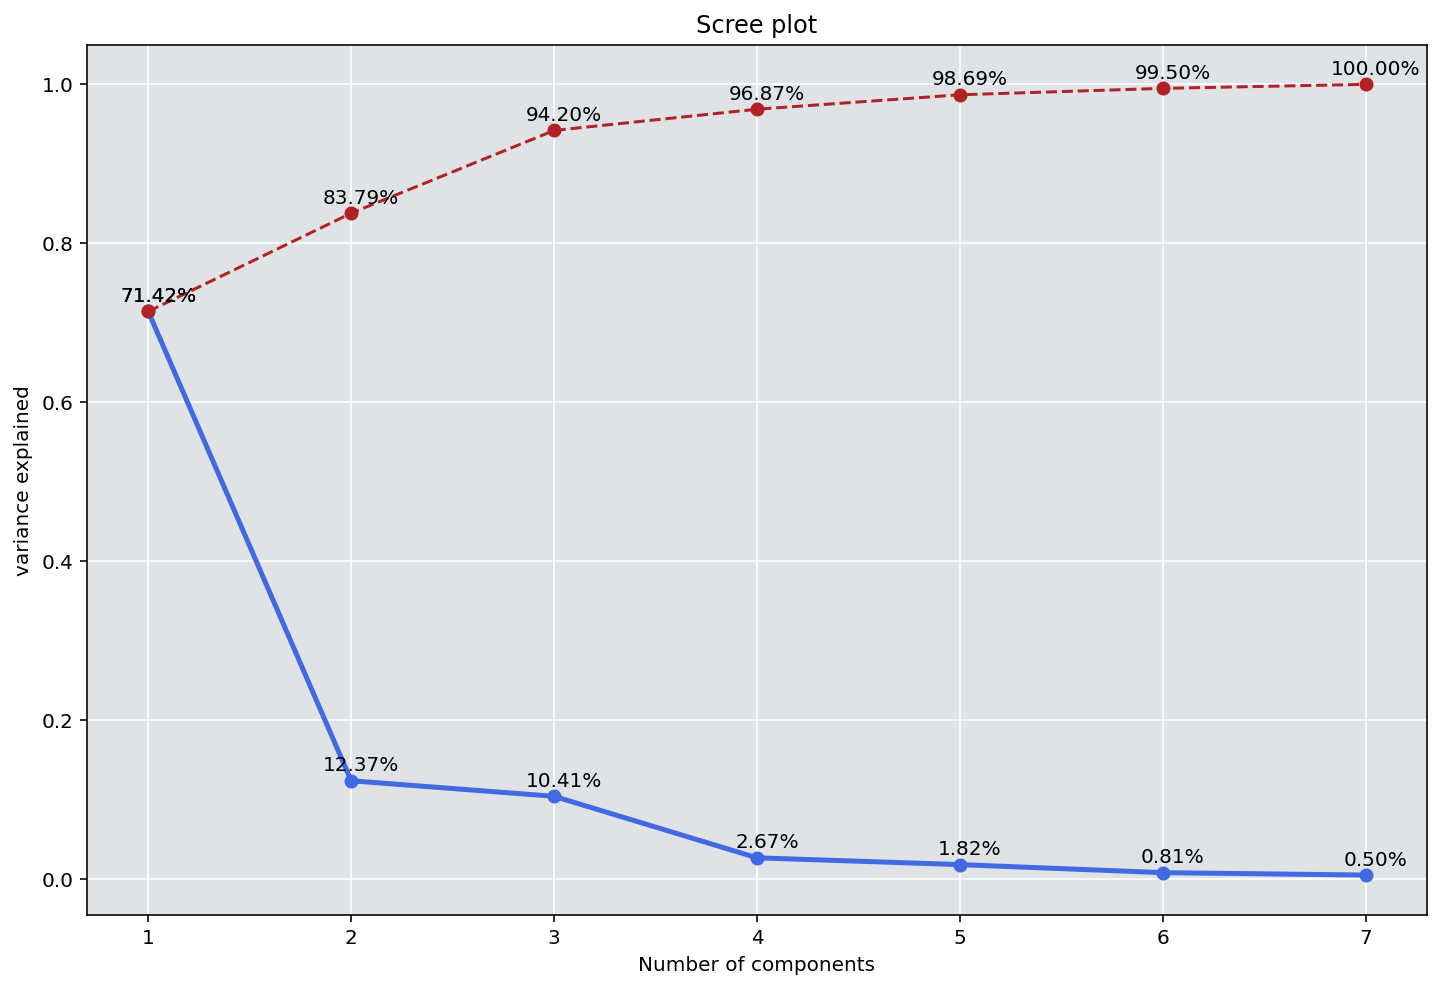

In [ ]:
#Create blank graph
plt.figure(figsize = (12, 8))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.xlabel('Number of components')
plt.ylabel('variance explained')
plt.title('Scree plot')

#Plotting
plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio, c = 'royalblue', marker = 'o', linewidth = 2.5, label = 'Individual')
plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio_cum, c = 'firebrick', marker = 'o', linestyle = '--', label = 'Cumulative')

#Adding values to plot
for x, ex_ratio, ex_ratio_cum in zip(range(1, explain_ratio.shape[0] + 1),
                                     explain_ratio,
                                     explain_ratio_cum):
  ex_ratio_label = f'{ex_ratio * 100:.2f}%'
  plt.annotate(ex_ratio_label, (x, ex_ratio), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')
  ex_ratio_cum_label = f'{ex_ratio_cum * 100:.2f}%'
  plt.annotate(ex_ratio_cum_label, (x, ex_ratio_cum), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')
  
#Show
plt.show()